In [1]:
# Plot the maps for the whole array and the subarrays

In [2]:
## Importing modules
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np
from os.path import join

In [3]:
## Inputs
root = "/Volumes/OmanData/geophones_no_prefilt/data"
subarray = "A"

eastmin_whole = -115
eastmax_whole = 65
northmin_whole = -100
northmax_whole = 105

eastmin_a = -20
eastmax_a = 65
northmin_a = -100
northmax_a = -25

In [4]:
## Read the station coordinates
inpath = join(root, "stations.csv")
stadf = pd.read_csv(inpath, delimiter=" ", index_col=0)


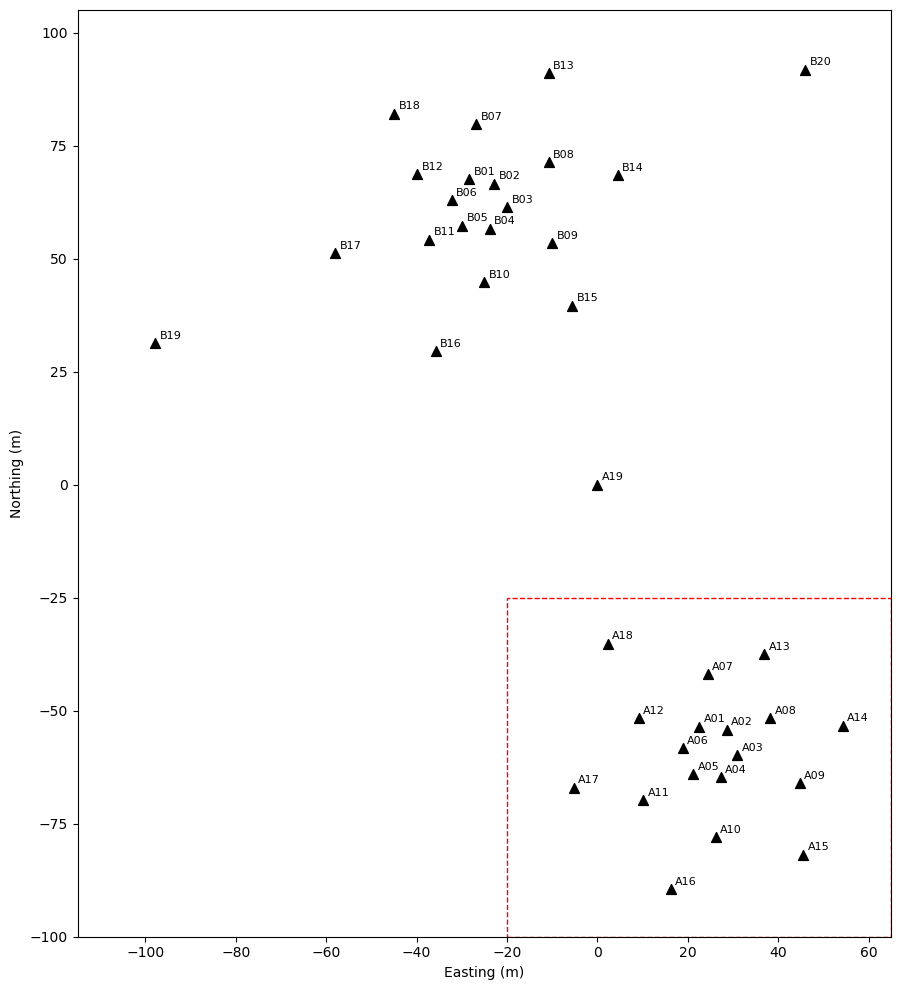

In [5]:
## Plot the whole array
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.scatter(stadf["easting"], stadf["northing"], marker="^", s=50, c="k")
for i, row in stadf.iterrows():
    ax.annotate(row["name"], (row["easting"]+1, row["northing"]+1), fontsize=8, color="k")

ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.set_xlim(eastmin_whole, eastmax_whole)
ax.set_ylim(northmin_whole, northmax_whole)
ax.set_aspect("equal")

if subarray == "A":
    # Create the rectangle patch
    rect = Rectangle((eastmin_a, northmin_a), eastmax_a - eastmin_a, northmax_a - northmin_a, 
                     linewidth=1, edgecolor='red', facecolor='none', linestyle='dashed')

    # Add the rectangle patch to the plot
    ax.add_patch(rect)

## Save the figure
fig.tight_layout()
filename = f"StationMap_WhoeArray_Sub{subarray}marked.png"

outpath = join(root, filename)
fig.savefig(outpath, dpi=300, transparent=True)


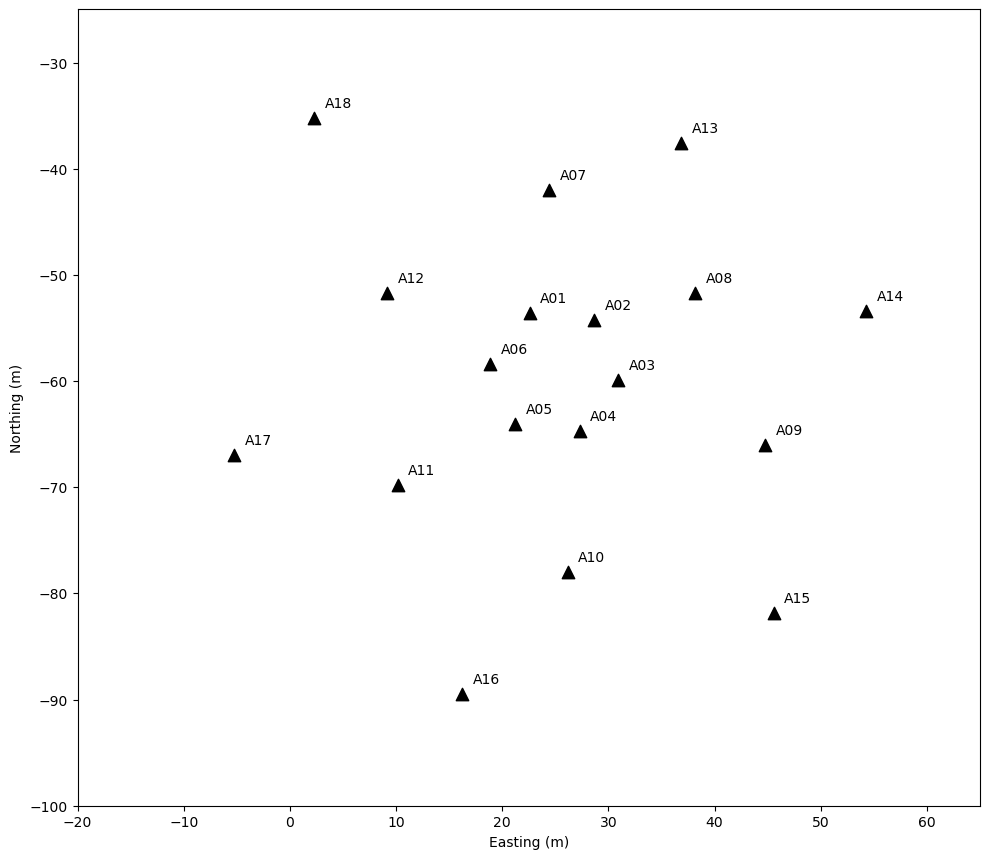

In [6]:
## Plot the subarray
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

stadf_a = stadf[stadf["subarray"] == subarray]

ax.scatter(stadf_a["easting"], stadf_a["northing"], marker="^", s=80, c="k")
for i, row in stadf_a.iterrows():
    ax.annotate(row["name"], (row["easting"]+1, row["northing"]+1), fontsize=10, color="k")

ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.set_xlim(eastmin_a, eastmax_a)
ax.set_ylim(northmin_a, northmax_a)
ax.set_aspect("equal")

## Save the figure
fig.tight_layout()
filename = f"StationMap_Array{subarray}.png"

outpath = join(root, filename)
fig.savefig(outpath, dpi=300, transparent=True)